# Introduction to AI & ML: Regression

In this notebook we are going to use regression models to solve two problems with different datasets.
The code is not complete, so you will need to modify some cells.
For both problems, we will follow these steps:
1. Import data
2. Process data
3. Divide it in train and test
4. Train the models
5. Evaluate the models

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Problem 1: California housing prices
For this first problem, we are going to use a dataset that contains aggregated information from different districts in California, each row represents a district.
These are the features and their meaning:
- **MedInc**: median income in the district
- **HouseAge**: average house age
- **AveRooms**: average number of rooms
- **AveBedrms**: average number of bedrooms
- **Population**: total inhabitants
- **AveOccup**: average occupants per household
- **Latitude**: latitude
- **Longitude**: longitude
- **MedHouseValue**: median house value (target variable)

### 1. Import data

In [33]:
data = fetch_california_housing(as_frame=True).frame

In [34]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


How many districts are there in our dataset?

In [35]:
print(f"We have a total of {len(data)} districts")

We have a total of 20640 districts


### 2. Process data

A quick glance at the distribution of our data

In [36]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Do we have NA/missing values?

In [37]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Do we have outliers?

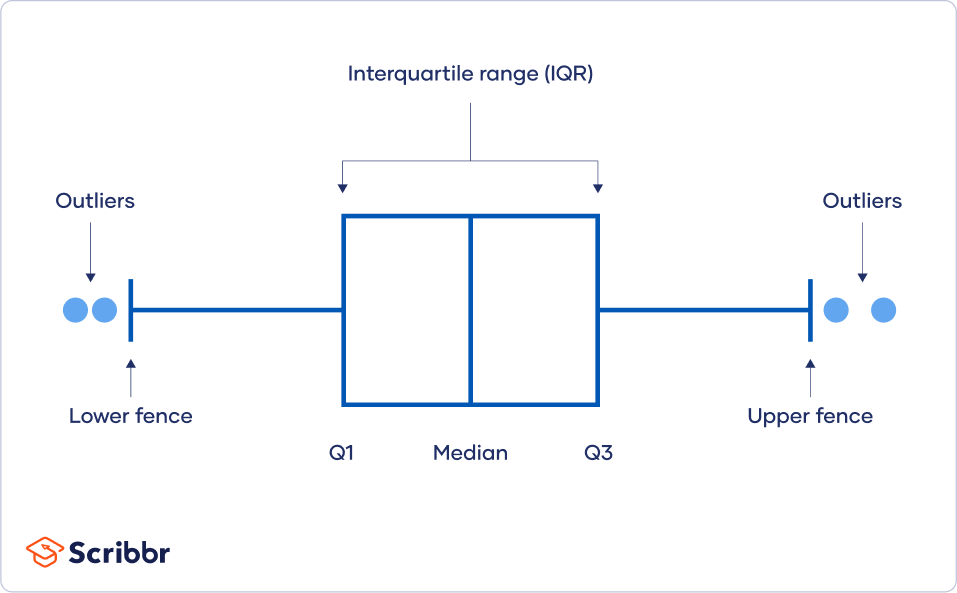

In [38]:
for col in data.columns:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower) & (data[col] <= upper)]


### 3. Divide in train and test

In [39]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4302,1.9063,52.0,3.603399,0.912181,984.0,2.787535,34.09,-118.29,2.616
17739,5.9399,10.0,6.036424,1.048565,3083.0,3.402870,37.30,-121.79,2.419
1001,3.5532,36.0,4.534946,1.000000,950.0,2.553763,37.68,-121.77,1.584
4625,3.5909,25.0,4.126506,1.064759,1420.0,2.138554,34.07,-118.32,4.045
613,4.6042,51.0,6.664122,1.025445,922.0,2.346056,37.73,-122.14,2.519


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7794,3.2857,37.0,5.120000,1.151111,981.0,4.360000,33.89,-118.08,1.536
9480,1.5625,21.0,3.930909,0.923636,715.0,2.600000,39.40,-123.36,0.715
9273,7.5000,9.0,6.852632,0.931579,682.0,3.589474,38.15,-122.58,4.232
11949,3.9118,32.0,5.527059,1.063529,1479.0,3.480000,33.94,-117.44,1.141
13831,5.5875,9.0,7.593668,1.064644,2158.0,2.846966,34.51,-117.23,1.678


What is the difference between train and test?

In [40]:
print(f"Train has {len(train)} rows and test has {len(test)} rows")

Train has 12985 rows and test has 3247 rows


Before going into training, we must go through a last step, separating our predictive and target variables.

In [41]:
X_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]

X_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

### 4. Train the model

Alright, now that our data is clean and processed, and that we have divided it in tran and test sets, we are ready to train the model. But, which model should we choose?

This is the big question, and the answer depends on multiple factors.
- Predictive features type
- Model complexity
- Relationship betweeen features

All models have different characteristics, and adjust better to certain types of datasets. In our case, ALL of our features are ______ and we want to choose a relatively simple model.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train);

### 5. Evaluate the model
How can we know if our model's predictions are good?

For that we can use a series of metrics that are calculated comparing the real values (y_test) against the model's predictions (y_pred) for test data.
The most common is the MSE(Mean Squared Error)

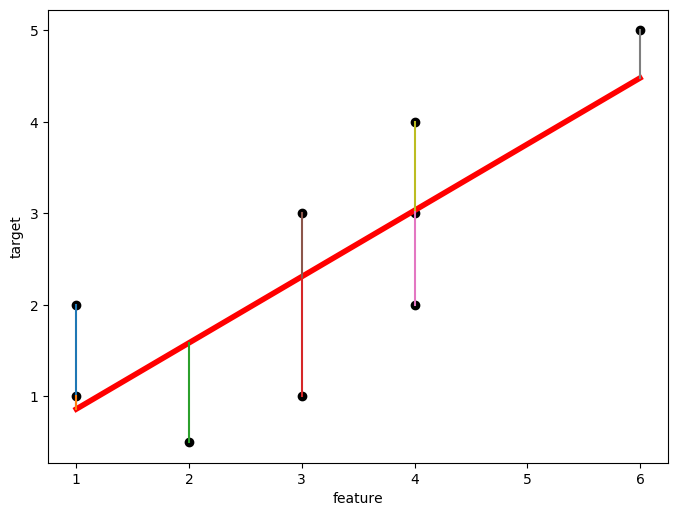


In [43]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("=== Training Performance ===")
print("MSE:", mean_squared_error(y_train, y_pred_train))

print("\n=== Test Performance ===")
print("MSE:", mean_squared_error(y_test, y_pred_test))

=== Training Performance ===
MSE: 0.31210912899399684

=== Test Performance ===
MSE: 0.3146760712686995


We can also use matplotlib to check our results visually.

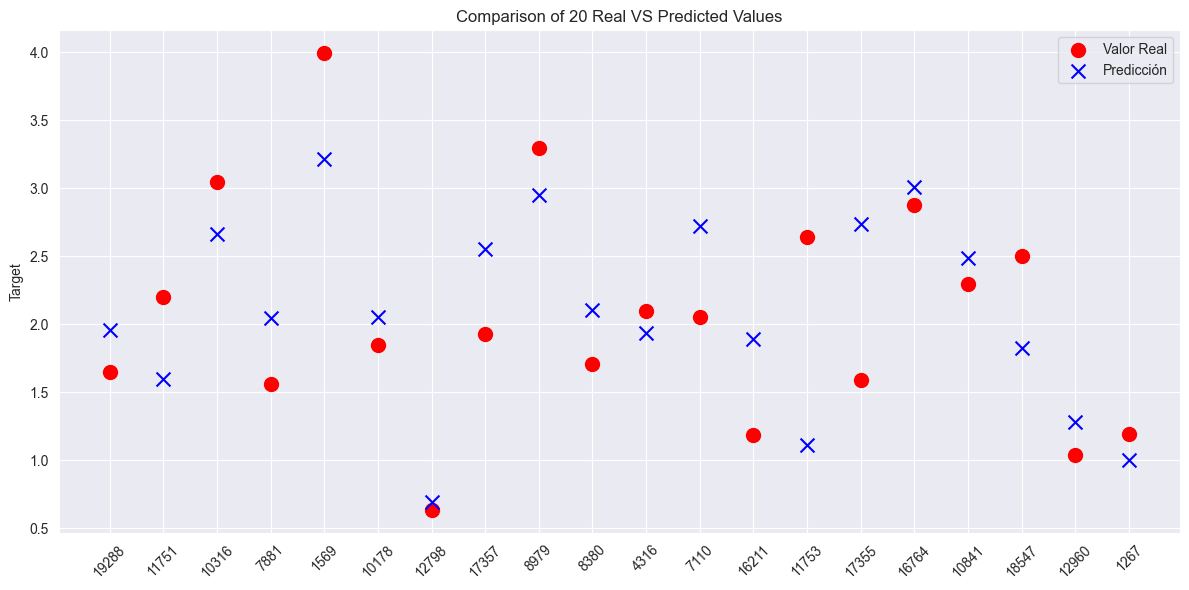

In [44]:
subset = X_test.copy()
subset['y_real'] = y_test
subset['y_pred'] = model.predict(X_test)
subset_20 = subset.sample(n=20, random_state=42)

index = range(len(subset_20))

plt.figure(figsize=(12,6))

plt.scatter(index, subset_20['y_real'], color='red', label='Valor Real', s=100)
plt.scatter(index, subset_20['y_pred'], color='blue', label='Predicción', s=100, marker='x')

plt.xticks(index, subset_20.index, rotation=45)
plt.ylabel('Target')
plt.title('Comparison of 20 Real VS Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

## Problem 2: Miles per Gallon

For the second problem, we are going to do something similar, but with a very different dataset. This will teach us that we must understand the data well in order to adapt every step of the process. Now we will work with different types of variables, and we will compare different models to choose the best one.

These are the variables we will be working with:

- **mpg**: fuel consumption in miles per gallon (target variable)
- **cylinders**: number of engine cylinders
- **displacement**: engine size
- **horsepower**: engine power
- **weight**: vehicle weight
- **acceleration**: time it takes to accelerate from 0 to 60 mph
- **model_year**: year of the car model
- **origin**: manufacturing region
- **name**: car name (brand and model)


### 1. Import data

In [45]:
mpg = sns.load_dataset("mpg")

In [46]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


How many observations/rows?

In [47]:
print(f"We have a total of  {len(mpg)} cars")

We have a total of  398 cars


### 2. Process data

In [48]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Unlike in the first problem, this time we have to process some variables individually

In [49]:
print(f"There are a total of {len(mpg['name'].unique())} different names/car models")

There are a total of 305 different names/car models


In [50]:
mpg.drop(columns=["name"], inplace=True)

Additionally, the origin variable is not numerical, which means our models won’t be able to train with it as it is.
We need to change its format, because if we simply remove it, we would lose valuable information.
We will convert it into a **dummy variable**.


In [51]:
print(mpg['origin'].unique())

['usa' 'japan' 'europe']


In [52]:
mpg = pd.get_dummies(mpg, columns=['origin'], drop_first=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,True


Missing values

In [53]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin_japan    0
origin_usa      0
dtype: int64

We replace with the mean value

In [54]:
average_horsepower = np.mean(mpg["horsepower"])
mpg.loc[mpg['horsepower'].isna(), 'horsepower'] = average_horsepower

Outliers

In [55]:
numeric_columns = mpg.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:

    Q1 = mpg[col].quantile(0.25)
    Q3 = mpg[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    total_outliers = len(mpg[(mpg[col] < lower) | (mpg[col] > upper)])

    print(f"Column {col} has {total_outliers} outliers")
    #mpg = mpg[(data[col] >= lower) & (mpg[col] <= upper)]


Column mpg has 1 outliers
Column cylinders has 0 outliers
Column displacement has 0 outliers
Column horsepower has 11 outliers
Column weight has 0 outliers
Column acceleration has 7 outliers
Column model_year has 0 outliers


### 3. Divide in train and test

In [56]:
train, test = train_test_split(mpg, test_size=0.2, random_state=42)

display(train.head())
display(test.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
3,16.0,8,304.0,150.0,3433,12.0,70,False,True
18,27.0,4,97.0,88.0,2130,14.5,70,True,False
376,37.0,4,91.0,68.0,2025,18.2,82,True,False
248,36.1,4,91.0,60.0,1800,16.4,78,True,False
177,23.0,4,115.0,95.0,2694,15.0,75,False,False


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
198,33.0,4,91.0,53.0,1795,17.4,76,True,False
396,28.0,4,120.0,79.0,2625,18.6,82,False,True
33,19.0,6,232.0,100.0,2634,13.0,71,False,True
208,13.0,8,318.0,150.0,3940,13.2,76,False,True
93,14.0,8,318.0,150.0,4237,14.5,73,False,True


In [57]:
print(f"Train has {len(train)} rows and test has {len(test)} rows")

Train has 318 rows and test has 80 rows


In [58]:
X_train = train.drop(columns=["mpg"])
y_train = train["mpg"]

X_test = test.drop(columns=["mpg"])
y_test = test["mpg"]

### 4. Train the models
For this problem we are going to train two different models, compare the results and choose the best regression model for this task.

Model 1: RandomForest

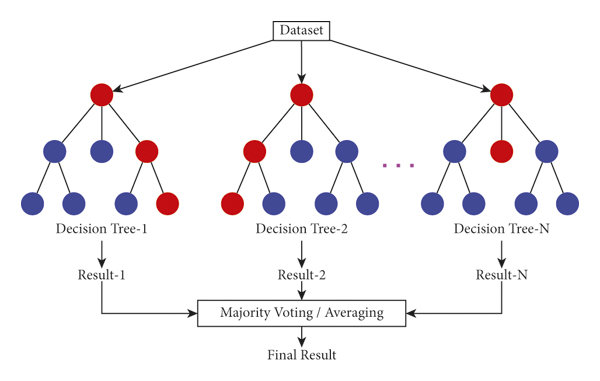

In [59]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train);

Model 2: Support Vector Machine

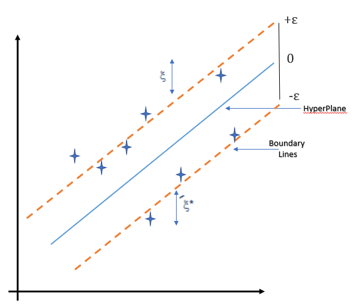

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train);

### 5. Evaluate the models

In [61]:
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")

Random Forest - Mean Squared Error: 4.67


In [62]:
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR - Mean Squared Error: {mse_svr:.2f}")

SVR - Mean Squared Error: 6.73
